# Comparison with APL library on OpenML benchmark datasets

In this notebook we will compare our library with official SAP HANA Automated Predictive Library (details here: https://help.sap.com/viewer/cb31bd99d09747089754a0ba75067ed2/2.5.0.0/en-US). In most cases, our library beats it in accuracy. However, there is always room for improvement. 

In [5]:
%load_ext jupyternotify
%load_ext autoreload
%autoreload 2
from benchmarks.perfomance import Benchmark
from benchmarks.cleanup import clean
from tests.connection import connection_context, schema
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hana_automl.utils.scripts import setup_user
import time

<IPython.core.display.Javascript object>

In [6]:
# setup_user(connection_context, 'MINECRAFT', "cdsofvhsoeifhJHDJHJKDH3829382")
# connection_context.sql("select * from schemas").collect()

In [7]:
b = Benchmark(connection_context, schema)
GRADIENT = True

In [8]:
df = pd.DataFrame()

In [9]:
def plot_results(task: str, boosting: bool):
    df['APL'] = apl_acc
    df['HANA AutoML'] = hana_acc
    df['Dataset'] = datasets
    x = np.arange(len(datasets))  # the label locations
    width = 0.45  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, apl_acc, width, label='APL')
    rects2 = ax.bar(x + width/2, hana_acc, width, label='HANA AutoML')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    if boosting:
        ax.set_title(f'{task} (APL with Gradient Boosting)')
    else:
        ax.set_title(f'{task} (APL without Gradient Boosting)')
    
    ax.set_xticks(x)
    ax.set_xticklabels(datasets)
    ax.legend()

    ax.bar_label(rects1)
    ax.bar_label(rects2)

    plt.gcf().set_size_inches(25,15)
    plt.style.use('default')
    plt.show()
    
def finish(benchmark):
    apl_acc.append(benchmark.apl_accuracy)
    hana_acc.append(benchmark.automl_accuracy)
    clean(connection_context, schema)
    time.sleep(180)
    
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## Enable Gradient boosting in APL by setting GRADIENT to True
Don't know what is Gradient Boosting? Check here: https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/ . We are using special benchmark datasets from OpenML to compare model accuracy.

## Classification

In [6]:
apl_acc = []
hana_acc = []
datasets = ['kr-vs-kp.csv', 'australian.csv', 'phoneme.csv', 'adult.csv', 'blood.csv', 'sylvine.csv', 'credit.csv', 'kc1.csv']

In [7]:
clean(connection_context, schema)
b.run('./data/benchmark/cls/kr-vs-kp.csv', task='cls', label='class', categorical=['class'], grad_boost=GRADIENT)
finish(b)

REMOVED ALL TABLES FROM DEVELOPER
100%|██████████| 1/1 [00:00<00:00,  4.00it/s]
Finished in 6 seconds
APL accuracy:  0.9885297184567258
REMOVED ALL TABLES FROM DEVELOPER
Finished in 167 seconds
hana_automl accuracy: 0.99373
REMOVED ALL TABLES FROM DEVELOPER


In [8]:
b.run('./data/benchmark/cls/australian.csv', task='cls', 
      label='A15', 
      categorical=['A15', 'A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12'],
      grad_boost=GRADIENT)
finish(b)

100%|██████████| 1/1 [00:00<00:00,  6.45it/s]
Finished in 5 seconds
APL accuracy:  0.8695652173913043
REMOVED ALL TABLES FROM DEVELOPER
Finished in 270 seconds
hana_automl accuracy: 0.89855
REMOVED ALL TABLES FROM DEVELOPER


In [9]:
b.run('./data/benchmark/cls/phoneme.csv', task='cls', label='Class', categorical=['Class'], grad_boost=GRADIENT)
finish(b)

100%|██████████| 1/1 [00:00<00:00,  5.42it/s]
Finished in 6 seconds
APL accuracy:  0.8797780517879161
REMOVED ALL TABLES FROM DEVELOPER
Finished in 281 seconds
hana_automl accuracy: 0.897959
REMOVED ALL TABLES FROM DEVELOPER


In [10]:
b.run('./data/benchmark/cls/adult.csv', task='cls', label='class', categorical=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'class'], grad_boost=GRADIENT)
finish(b)

100%|██████████| 1/1 [00:01<00:00,  1.26s/it]
Finished in 12 seconds
APL accuracy:  0.868832321026411
REMOVED ALL TABLES FROM DEVELOPER
Finished in 329 seconds
hana_automl accuracy: 0.865751
REMOVED ALL TABLES FROM DEVELOPER


In [20]:
b.run('./data/benchmark/cls/blood.csv', task='cls', label='Class', categorical=['Class'], grad_boost=GRADIENT)
finish(b)

100%|██████████| 1/1 [00:00<00:00,  6.19it/s]
Finished in 5 seconds
APL accuracy:  0.7733333333333333
REMOVED ALL TABLES FROM DEVELOPER
Finished in 275 seconds
hana_automl accuracy: 0.81132
REMOVED ALL TABLES FROM DEVELOPER


In [8]:
b.run('./data/benchmark/cls/sylvine.csv', task='cls', label='class', categorical=['class'], grad_boost=GRADIENT)
finish(b)

100%|██████████| 1/1 [00:00<00:00,  4.57it/s]


Finished in 6 seconds
APL accuracy:  0.9401820546163849
REMOVED ALL TABLES FROM DEVELOPER
Finished in 400 seconds
hana_automl accuracy: 0.929687
REMOVED ALL TABLES FROM DEVELOPER


In [9]:
b.run('./data/benchmark/cls/credit.csv', task='cls', label='class', categorical=['class', 'checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker'], grad_boost=GRADIENT)
finish(b)

100%|██████████| 1/1 [00:00<00:00,  6.48it/s]


Finished in 5 seconds
APL accuracy:  0.7366666666666667
REMOVED ALL TABLES FROM DEVELOPER
Finished in 342 seconds
hana_automl accuracy: 0.8
REMOVED ALL TABLES FROM DEVELOPER


In [10]:
b.run('./data/benchmark/cls/kc1.csv', task='cls', label='defects', categorical=['defects'], grad_boost=GRADIENT)
finish(b)

100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


Finished in 7 seconds
APL accuracy:  0.8546603475513428
REMOVED ALL TABLES FROM DEVELOPER
Finished in 615 seconds
hana_automl accuracy: 0.776859
REMOVED ALL TABLES FROM DEVELOPER


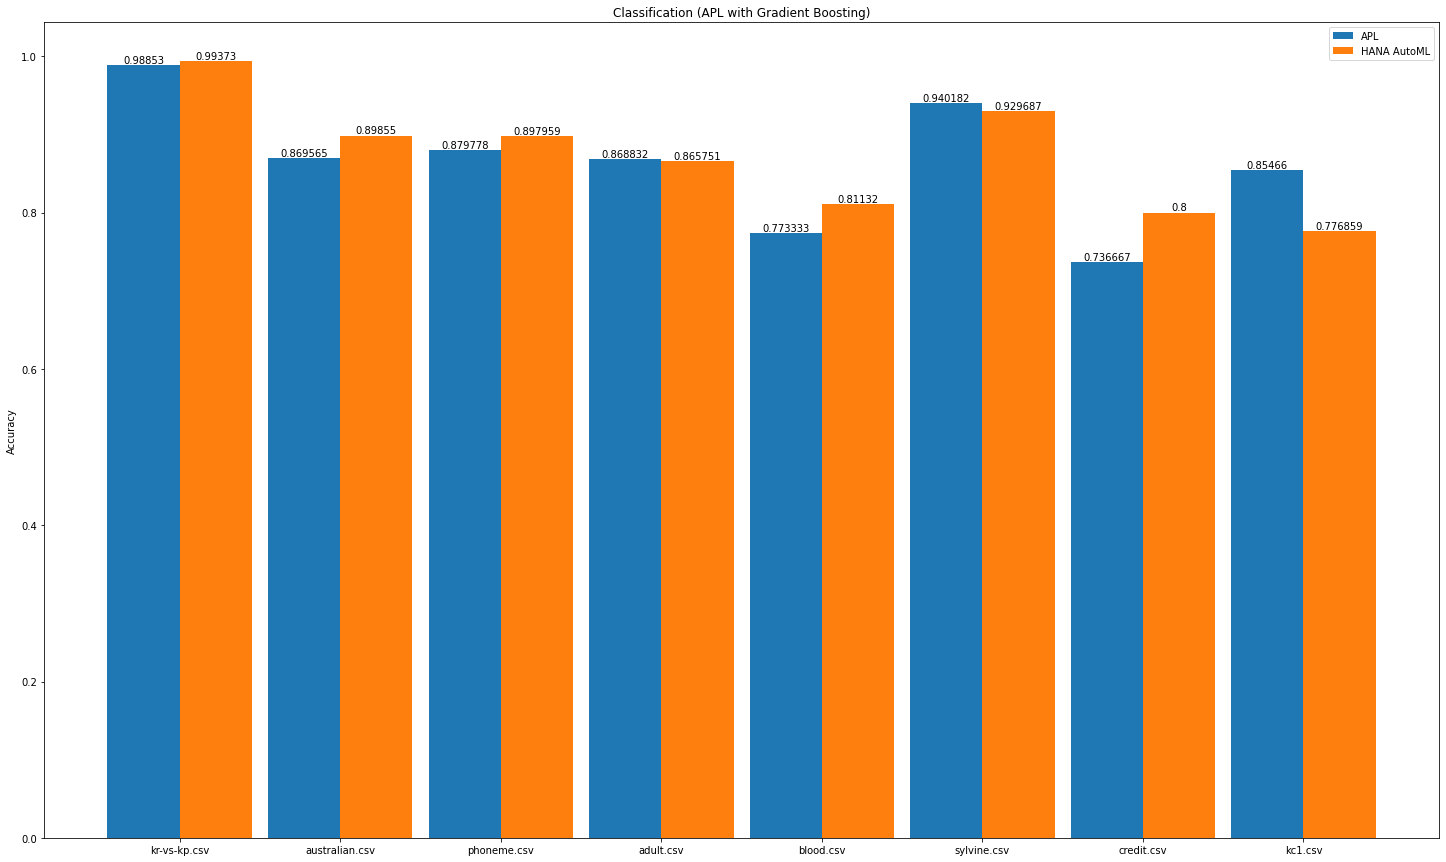

In [11]:
hana_acc = [0.99373, 0.89855, 0.897959, 0.865751, 0.81132, 0.929687, 0.8, 0.776859]
apl_acc = [0.9885297184567258, 0.8695652173913043, 0.8797780517879161, 0.868832321026411, 0.7733333333333333, 0.9401820546163849, 0.7366666666666667, 0.8546603475513428]
plot_results(task='Classification', boosting=GRADIENT)

## Regression

In [ ]:
datasets = ['elevators.csv', 'wine_quality.csv', 'baseball.csv', 'boston.csv', 'tecator.csv', 'space_ga.csv', 'pol.csv', 'socmob.csv']
hana_acc = []
apl_acc = []
clean(connection_context, schema)

In [ ]:
%%notify
b.run('./data/benchmark/reg/elevators.csv', task='reg', label='Goal', grad_boost=GRADIENT)
finish(b)

In [ ]:
%%notify
b.run('./data/benchmark/reg/wine_quality.csv', task='reg', label='quality', grad_boost=GRADIENT)
finish(b)

In [ ]:
%%notify
b.run('./data/benchmark/reg/baseball.csv', task='reg', label='RS', grad_boost=GRADIENT)
finish(b)

In [ ]:
%%notify
b.run('./data/benchmark/reg/boston.csv', task='reg', label='MEDV', grad_boost=GRADIENT)
finish(b)

In [ ]:
%%notify
b.run('./data/benchmark/reg/tecator.csv', task='reg', label='fat', grad_boost=GRADIENT)
finish(b)

In [ ]:
%%notify
b.run('./data/benchmark/reg/space_ga.csv', task='reg', label='ln(VOTES/POP)', grad_boost=GRADIENT)
finish(b)

In [ ]:
%%notify
b.run('./data/benchmark/reg/pol.csv', task='reg', label='foo', grad_boost=GRADIENT)
finish(b)

In [ ]:
%%notify
b.run('./data/benchmark/reg/socmob.csv', task='reg', label='counts_for_sons_current_occupation', categorical=['fathers_occupation','sons_occupation', 'family_structure', 'race'],grad_boost=GRADIENT)
finish(b)

In [ ]:
hana_acc = [0.8753186740608836, 0.38712821265860387, 0.9366921697454966, 0.8272694767533825, 0.9943877154701021, 0.7081623532908919, 0.980216625155045, 0.9376376904944593]
apl_acc = [0.8382246438752253, 0.17297255051855154, 0.9337722036910887, 0.7792124816136172, 0.9930549624241458, 0.7075101327273563, 0.8782178100191081, 0.6624122582210749]

print('APL ACCURACY', apl_acc)
print('AutoML ACCURACY', hana_acc)
print(len(datasets), len(hana_acc), len(apl_acc))
plot_results(task='Regression', boosting=False)